# Document Classification using Scikit

# Pre-processing

In [1]:
import pandas as pd
import os
import re
from nltk.corpus import stopwords

In [2]:
directory = "/home/praveen/tensorflow_Data/Text_full"

In [3]:
f_names = []

In [4]:
filenames = os.listdir(directory)
    
for file in filenames:
    f_name = os.path.join(directory, file)
    f_names.append(f_name)

In [5]:
data_corpus = {}

for f in filenames:
    f_name = os.path.join(directory, f)
    fi = open(f_name)
    data = fi.read().lower()
    data_corpus[f] = data

In [6]:
data_corpus['ap-3815.pdf.txt']

'united states of america\nbefore the\nsecurities and exchange commission\nwashington, d.c. 20549\nadministrative proceedings rulings\nrelease no. 3815/april 29, 2016\nadministrative proceeding\nfile no. 3-17133\n\nin the matter of\ntexstar oil corporation, and\nbonamour, inc.\n\nstay order\n\ntoday, the parties filed a joint motion to stay this proceeding based upon their agreement\nin principle to a settlement that will resolve the proceeding on all major terms.\nfor good cause shown, it is ordered that the joint motion is granted, and the\nproceeding is stayed, subject to compliance with rule of practice 161(c)(2), 17 c.f.r.\n\xc2\xa7 201.161(c)(2), requiring that this office be notified promptly if any of the requirements of the\nrule are not met.\n_______________________________\njason s. patil\nadministrative law judge\n\n\x0c'

In [7]:
data = pd.DataFrame.from_dict(data_corpus,orient='index')

In [8]:
data = data.reset_index()
data.columns = ['file_name','text']

In [9]:
data

,file_name,text
0,ap-4081.pdf.txt,united states of america\nbefore the\nsecuriti...
1,ap-3948.pdf.txt,united states of america\nbefore the\nsecuriti...
2,id744cff.pdf.txt,initial decision release no. 744\nadministrati...
3,ap-3748.pdf.txt,united states of america\nbefore the\nsecuriti...
4,33-10168.pdf.txt,united states of america\nbefore the\nsecuriti...
5,34-68988.pdf.txt,united states of america\nbefore the\nsecuriti...
6,33-10094.pdf.txt,united states of america\nbefore the\nsecuriti...
7,ap-3777.pdf.txt,united states of america\nbefore the\nsecuriti...
8,34-75165.pdf.txt,securities and exchange commission\nrelease no...
9,id302cff.pdf.txt,initial decision release no. 302\nadministrati...


In [10]:
def clean_text(raw_text):
    letters_only = re.sub("[^a-z]", " ", raw_text)
    words = letters_only.split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops and len(w)>1]
    return( " ".join( meaningful_words ))

In [11]:
print stopwords.words("english")

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [12]:
data['text_clean'] = data['text'].apply(clean_text)

In [13]:
data['text'][0]

'united states of america\nbefore the\nsecurities and exchange commission\nwashington, d.c. 20549\nadministrative proceedings rulings\nrelease no. 4081/august 22, 2016\nadministrative proceeding\nfile no. 3-17376\n\nin the matter of\neastland financial corp.,\ngranite cliffs, incorporated, and\ngreater asia realty holdings, ltd.\n\norder postponing hearing and\nscheduling prehearing\nconference\n\non august 10, 2016, the securities and exchange commission issued an order instituting\nproceedings (oip) against respondents pursuant to section 12(j) of the securities exchange act\nof 1934. the hearing is scheduled to commence on august 29, 2016.\non august 18, 2016, the division of enforcement filed a declaration of service\nestablishing that respondents were served with the oip by u.s. postal service express mail on\naugust 15, 2016, in accordance with rule of practice 141(a)(2)(ii), 17 c.f.r. \xc2\xa7 201.141(a)(ii).\nrespondents\xe2\x80\x99 answers are due by august 29, 2016. oip at 3;

In [14]:
data['text_clean'][0]

'united states america securities exchange commission washington administrative proceedings rulings release august administrative proceeding file matter eastland financial corp granite cliffs incorporated greater asia realty holdings ltd order postponing hearing scheduling prehearing conference august securities exchange commission issued order instituting proceedings oip respondents pursuant section securities exchange act hearing scheduled commence august august division enforcement filed declaration service establishing respondents served oip postal service express mail august accordance rule practice ii ii respondents answers due august oip order hearing scheduled august postponed telephonic prehearing conference shall held edt september respondent fails timely file answer appear prehearing conference otherwise defend proceeding deemed default registration securities revoked oip james grimes administrative law judge'

# Creating TF-IDF

In [15]:
import sklearn as sk
import scipy as sc
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [17]:
train_data_features = vectorizer.fit_transform(data['text_clean'])

In [18]:
train_data_features

<3675x5000 sparse matrix of type '<type 'numpy.float64'>'
	with 1615562 stored elements in Compressed Sparse Row format>

In [19]:
train_data_features.get_shape()

(3675, 5000)

In [20]:
train_data_norm = sk.preprocessing.normalize(train_data_features,norm='l1')

In [21]:
train_data_np = train_data_norm.toarray()

In [22]:
sum(train_data_np[1])

0.99999999999999944

In [23]:
vocab = vectorizer.get_feature_names()
print vocab

[u'aa', u'aaer', u'aaron', u'ab', u'aba', u'abcp', u'abetted', u'abetting', u'ability', u'able', u'abroad', u'abs', u'absence', u'absent', u'absolute', u'abuse', u'abuses', u'abusive', u'abx', u'ac', u'academic', u'accelerated', u'accept', u'acceptable', u'acceptance', u'accepted', u'accepting', u'access', u'accessed', u'accessible', u'accho', u'accommodate', u'accommodation', u'accompanied', u'accompanying', u'accomplish', u'accomplished', u'accord', u'accordance', u'according', u'accordingly', u'account', u'accountability', u'accountant', u'accountants', u'accounted', u'accountholder', u'accountholders', u'accounting', u'accounts', u'accredited', u'accrual', u'accrue', u'accrued', u'accumulated', u'accuracy', u'accurate', u'accurately', u'ach', u'achieve', u'achieved', u'achievement', u'achieving', u'acknowledge', u'acknowledged', u'acknowledges', u'acknowledgment', u'acquire', u'acquired', u'acquiring', u'acquisition', u'acquisitions', u'across', u'act', u'acted', u'acting', u'actio

In [24]:
tf_idf_sum = np.sum(train_data_np, axis=0)
tf_idf_sum_vocab = pd.DataFrame(data=zip(vocab, tf_idf_sum),columns=['word','tf_idf_sum'])

In [25]:
tf_idf_sum_vocab.sort_values(by=['tf_idf_sum'],ascending=False)

,word,tf_idf_sum
881,commission,44.433542
4117,securities,32.545819
1760,exchange,27.894575
73,act,26.131596
3190,order,24.491753
113,administrative,22.308244
3935,respondent,21.891723
2327,inc,19.866891
3640,pursuant,17.580753
2054,fund,16.673123


# PCA

In [26]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(train_data_np)

In [27]:
pca_comp[:,0]

array([ 0.06602389,  0.02235789, -0.00423838, ..., -0.03558689,
       -0.01680562,  0.00598382])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

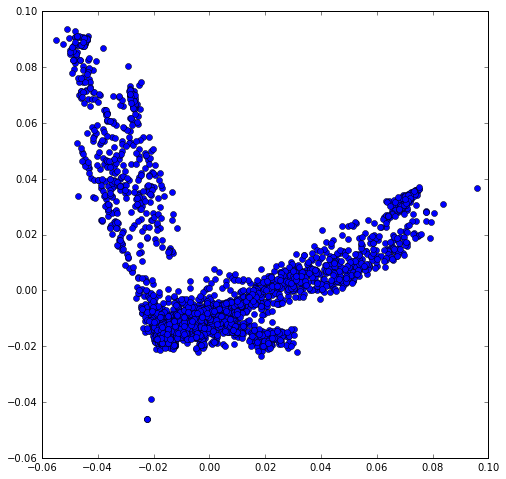

In [29]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pca_comp[:,0],pca_comp[:,1],'bo')
plt.show()

# K-means

In [30]:
from sklearn.cluster import KMeans

In [31]:
KMeans_euc_model = KMeans(n_clusters=4).fit(train_data_norm)

In [32]:
KMeans_euc_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [33]:
np.bincount(KMeans_euc_model.labels_)

array([ 158, 2556,  432,  529])

In [34]:
KMeans_euc_model.cluster_centers_

array([[  0.00000000e+00,   0.00000000e+00,   8.04812045e-05, ...,
          0.00000000e+00,   0.00000000e+00,   1.72460876e-04],
       [  7.00502491e-05,   5.23806493e-05,   8.97265290e-05, ...,
          1.13289950e-05,   2.90087137e-05,   4.87266992e-05],
       [  1.06029394e-06,   0.00000000e+00,   1.41924858e-05, ...,
          0.00000000e+00,   1.46499890e-05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   7.62366644e-05, ...,
          0.00000000e+00,   0.00000000e+00,   2.05278468e-05]])

In [35]:
KMeans_euc_model.inertia_

43.742052892742954

In [63]:
KMeans_model = []

for i in xrange(2,16):
    print "Running Kmeans with ",i," clusters"
    KMeans_model.append(KMeans(n_clusters=i).fit(train_data_norm))

Running Kmeans with  2  clusters
Running Kmeans with  3  clusters
Running Kmeans with  4  clusters
Running Kmeans with  5  clusters
Running Kmeans with  6  clusters
Running Kmeans with  7  clusters
Running Kmeans with  8  clusters
Running Kmeans with  9  clusters
Running Kmeans with  10  clusters
Running Kmeans with  11  clusters
Running Kmeans with  12  clusters
Running Kmeans with  13  clusters
Running Kmeans with  14  clusters
Running Kmeans with  15  clusters


In [36]:
import pickle

#with open("KMeans_models", "wb") as fp: 
    #pickle.dump(KMeans_model, fp)
    
with open("KMeans_models", "rb") as fp: 
    KMeans_model = pickle.load(fp)

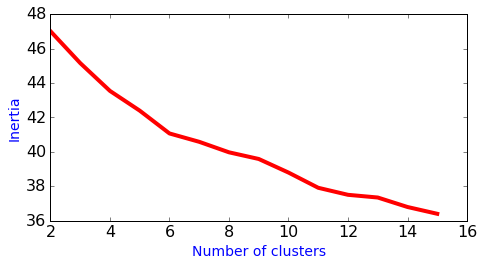

In [37]:
inertia = [i.inertia_ for i in KMeans_model]

plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(range(2,16)),np.array(inertia),linestyle='solid',linewidth=4, color='red')
plt.xlabel('Number of clusters',fontsize=14, color='blue')
plt.ylabel('Inertia',fontsize=14, color='blue')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

In [38]:
for i in xrange(0,14):
    print "Num of clusters: ",KMeans_model[i].n_clusters
    print "Num of docs in each cluster: ",np.bincount(KMeans_model[i].labels_)
    print "----------------------------------------------------------------------------------------------------------------"

Num of clusters:  2
Num of docs in each cluster:  [ 679 2996]
----------------------------------------------------------------------------------------------------------------
Num of clusters:  3
Num of docs in each cluster:  [2439  805  431]
----------------------------------------------------------------------------------------------------------------
Num of clusters:  4
Num of docs in each cluster:  [ 431  659  139 2446]
----------------------------------------------------------------------------------------------------------------
Num of clusters:  5
Num of docs in each cluster:  [ 139   66  660  359 2451]
----------------------------------------------------------------------------------------------------------------
Num of clusters:  6
Num of docs in each cluster:  [ 158 2432  521  359  139   66]
----------------------------------------------------------------------------------------------------------------
Num of clusters:  7
Num of docs in each cluster:  [  58  158  453  359  139

In [121]:
KMeans_model[13].cluster_centers_[KMeans_model[13].labels_].shape

(3675, 5000)

In [47]:
train_data_np.shape

(3675, 5000)

In [127]:
dist_doc_centroid = np.zeros(shape=(3675))

for i in xrange(train_data_np.shape[0]): 
    cluster_id = KMeans_model[13].labels_[i]
    dist_doc_centroid[i] = sc.spatial.distance.euclidean(train_data_np[i], 

                                                         
                                                         KMeans_model[13].cluster_centers_[cluster_id])

In [136]:
dist_doc_centroid

array([ 0.0978656 ,  0.08637555,  0.06298838, ...,  0.10056183,
        0.07954334,  0.09594683])

In [193]:
import pprint

def print_file_with_clusters(num_clusters):
    file_with_clusters = {}
    data['cluster'] = KMeans_model[num_clusters - 1].labels_
    
    for i in xrange(num_clusters):
        file_with_clusters[i] = list(data[data['cluster']==i]['file_name'].values[0:10])
    
    pprint.pprint(file_with_clusters)

In [200]:
print_file_with_clusters(7)

{0: ['comp23614.pdf.txt',
     'comp23634.pdf.txt',
     'comp23668.pdf.txt',
     '34-72851-ppd-first-payment-exhibit-a.pdf.txt',
     'comp23561.pdf.txt'],
 1: ['ap-4081.pdf.txt',
     'ap-3948.pdf.txt',
     'ap-3748.pdf.txt',
     'ap-3777.pdf.txt',
     'ap-3492.pdf.txt',
     'ap-4000.pdf.txt',
     'ap-4135.pdf.txt',
     'ap-3455.pdf.txt',
     'ap-3474.pdf.txt',
     'ap-3871.pdf.txt'],
 2: ['id744cff.pdf.txt',
     '33-10168.pdf.txt',
     '33-10094.pdf.txt',
     '34-75165.pdf.txt',
     'id302cff.pdf.txt',
     'ap-3776.pdf.txt',
     'monyquiz.pdf.txt',
     '34-77739.pdf.txt',
     '33-10228.pdf.txt',
     '34-77288.pdf.txt'],
 3: ['34-70082.pdf.txt',
     '34-72247.pdf.txt',
     '34-69604-pdp.pdf.txt',
     '34-60056a.pdf.txt',
     '34-77497-pdp.pdf.txt',
     '34-63143.pdf.txt',
     '34-60310.pdf.txt',
     '34-62936.pdf.txt',
     '34-74993.pdf.txt',
     '34-70151.pdf.txt'],
 4: ['34-77751.pdf.txt',
     '34-77948.pdf.txt',
     '34-77530.pdf.txt',
     '34-76921.p